In [4]:
import tensorflow as tf

import numpy as np

In [5]:
# https://www.youtube.com/watch?v=3kOa1d_2ZmU

# Data Prepare START

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Prepare END





def vgg_block(in_layer, n_conv, n_filter, filter_size=(3, 3), reduce_size=True):

    layer = in_layer

    for i in range(n_conv):

        layer = tf.keras.layers.Conv2D(n_filter, filter_size, padding='SAME', activation='relu')(layer)



    if reduce_size:

        layer = tf.keras.layers.MaxPool2D((2, 2))(layer)

    return layer





input_layer = tf.keras.layers.Input(shape=(32, 32, 3))

vgg_block01 = vgg_block(input_layer, 2, 32) # 16x16x32

vgg_block02 = vgg_block(vgg_block01, 2, 64) # 8x8x64

vgg_block03 = vgg_block(vgg_block02, 3, 128) # 4x4x128



flatten = tf.keras.layers.Flatten()(vgg_block03) # 2048

dense01 = tf.keras.layers.Dense(512, activation='relu')(flatten)

output = tf.keras.layers.Dense(10, activation='softmax')(dense01)



model = tf.keras.models.Model(input_layer, output)



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



model.fit(x_train, y_train, batch_size=64, epochs=10,

          validation_data=(x_test, y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0   

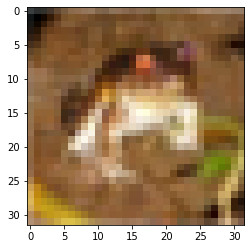

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

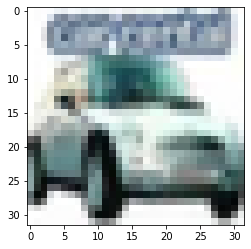

In [11]:
plt.imshow(x_train[40000])

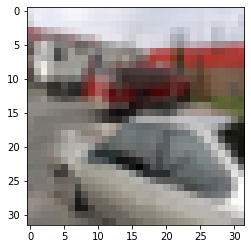

In [12]:
plt.imshow(x_train[49999])

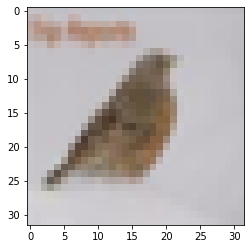

In [13]:
plt.imshow(x_train[108])

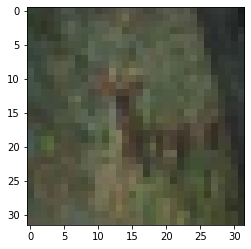

In [14]:
plt.imshow(x_train[10])

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)